In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

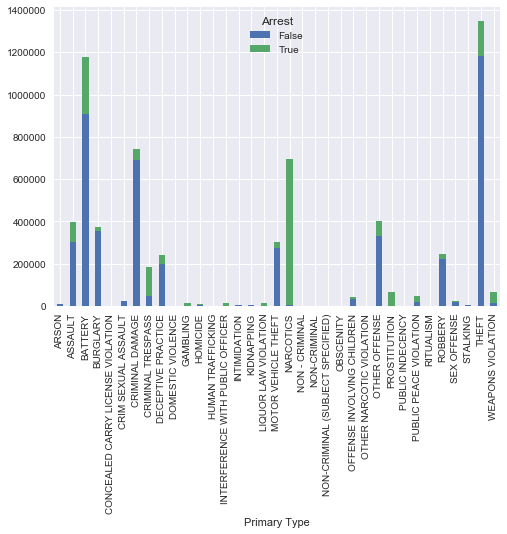

In [3]:
# plot number of reports for each primary_type (distinguishing between arrests)
primary_type_by_arrest = pd.pivot_table(df, index="Primary Type", columns= "Arrest", aggfunc='size')
primary_type_by_arrest.plot.bar(stacked=True)
plt.show()

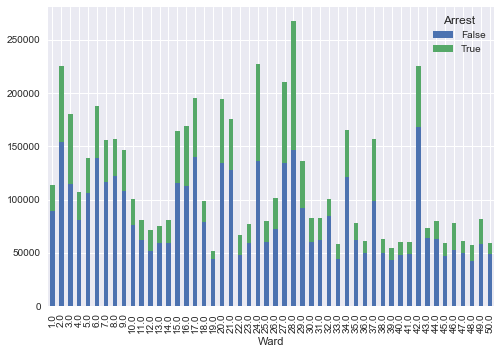

In [4]:
# plot number of reports for each ward (distinguishing between arrests)
ward_by_arrest = pd.pivot_table(df, index="Ward", columns= "Arrest", aggfunc='size')
ward_by_arrest.plot.bar(stacked=True)
plt.show()

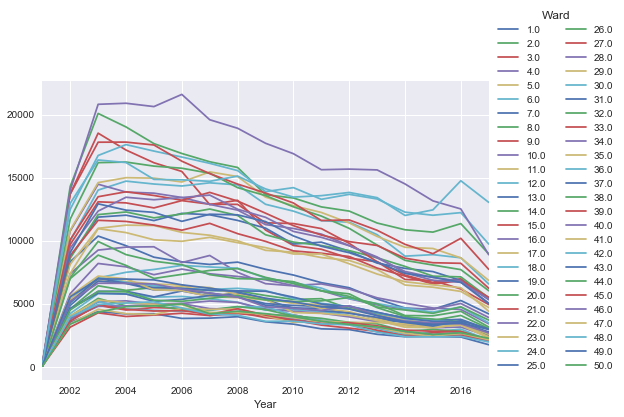

In [5]:
# plot ward reports over time
wards_over_time = pd.pivot_table(df, index="Year", columns="Ward", aggfunc='size')
wards_over_time.plot.line()
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0), ncol=2, title="Ward")
plt.show()

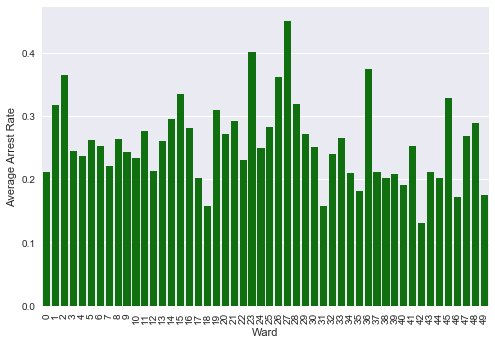

In [6]:
# plot average arrest rates by ward
ward_arrest_rates = df[["Ward", "Arrest"]].groupby("Ward", as_index=False).mean()
ax = sns.barplot(x="Ward", y="Arrest", data=ward_arrest_rates, color="green", )
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

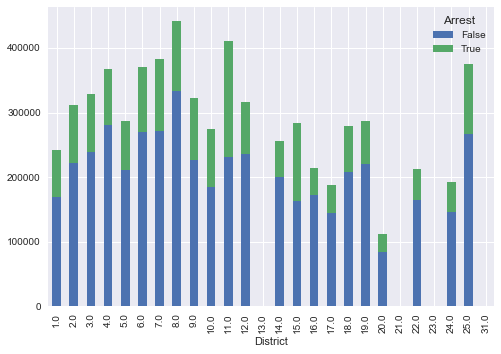

In [7]:
# plot number of reports for each district (distinguishing between arrests)
district_by_arrest = pd.pivot_table(df, index="District", columns= "Arrest", aggfunc='size')
district_by_arrest.plot.bar(stacked=True)
plt.show()

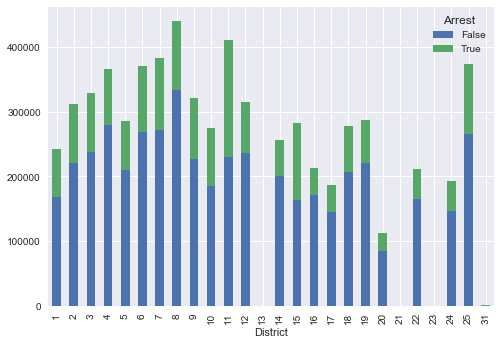

In [8]:
# plot histogram of reports per district
df = df[np.isfinite(df["District"])] # drop N/A values
df[['District']] = df[['District']].astype(int) # convert "District" column to int

district_by_arrest = pd.pivot_table(df, index="District", columns="Arrest", aggfunc='size')
district_by_arrest.plot.bar(stacked=True)
plt.show()

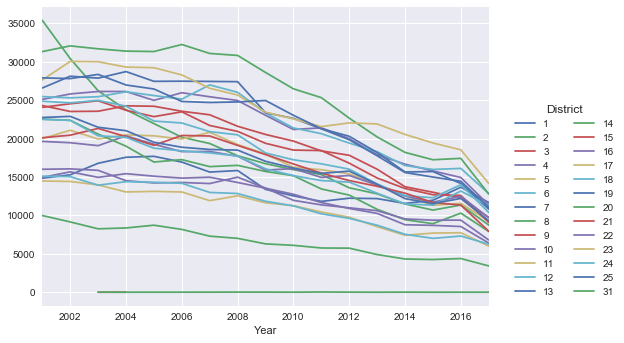

In [9]:
# plot district reports over time
districts_over_time = pd.pivot_table(df, index="Year", columns="District", aggfunc='size')
districts_over_time.plot.line()
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0), ncol=2, title="District")
plt.show()

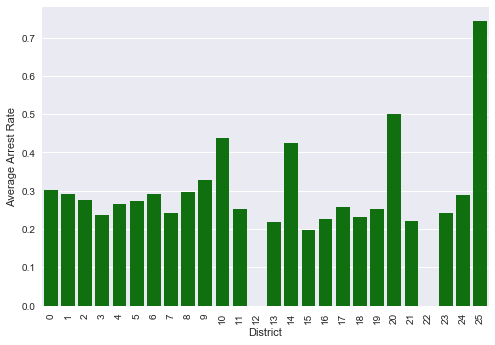

In [10]:
# plot average arrest rates by district
district_arrest_rates = df[["District", "Arrest"]].groupby("District", as_index=False).mean()
ax = sns.barplot(x="District", y="Arrest", data=district_arrest_rates, color="green", )
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel("Average Arrest Rate") 
plt.show()

/Users/bridgetcheng/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/bridgetcheng/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/bridgetcheng/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


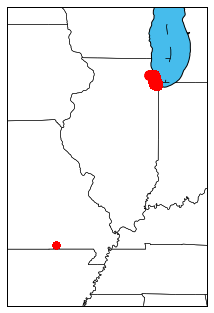

In [12]:
from mpl_toolkits.basemap import Basemap

# read in data to use for plotted points
lat = df['Latitude'].values
lon = df['Longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.show()